<a href="https://colab.research.google.com/github/soaresbru/aleatorio/blob/main/ftc_lista_2_quest%C3%A3o_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Para uma barra com temperatura Ta= 100°C e Tb= 500°C, condutividade k= 100 W/m K, e seção A=10 x 10-³ m²
 
Matrix
[[ 300. -100.    0.    0.    0.]
 [-100.  200. -100.    0.    0.]
 [   0. -100.  200. -100.    0.]
 [   0.    0. -100.  200. -100.]
 [   0.    0.    0. -100.  300.]]
[[ 20000.]
 [     0.]
 [     0.]
 [     0.]
 [100000.]]
 
Solução numérica
[[140.]
 [220.]
 [300.]
 [380.]
 [460.]]
 
Solução analítica
[[140.]
 [220.]
 [300.]
 [380.]
 [460.]]
 
diferença entre a solução númerica e exata
[[ 2.84217094e-14]
 [ 2.84217094e-14]
 [-5.68434189e-14]
 [ 0.00000000e+00]
 [-1.13686838e-13]]
 
Erro Percentual
[[ 2.03012210e-14]
 [ 1.29189588e-14]
 [-1.89478063e-14]
 [ 0.00000000e+00]
 [-2.47145299e-14]]


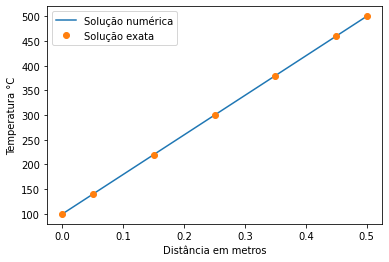

In [ ]:
print("Para uma barra com temperatura Ta= 100°C e Tb= 500°C, condutividade k= 100 W/m K, e seção A=10 x 10-³ m²")

#colocando os parârametros e variáveis
ta=100 #temperatura inicial
tb=500  #temperatura final
k=1000 #condutividade térmica
a=0.010 #área transversal
l=0.5 #tamanho da barra
n=5 #número de nós
x= l/n

#Para este calculo vamos dividir a barra em 6 partes, ou seja fazer cinco divisões #

#nos pontos do meio, temos
ad = (k/x)*a  #calculando o ponto a direita
ae = (k/x)*a  #calculando o ponto a esquerda
ap = ad + ae  #calculando o ponto atual

#nos pontos da extremidade esquerda
aed = 0
aee = (k/x)*a
spe = -((2*k*a)/x)
ape = aed + aee - spe

#nos pontos da extremidade direita
ade = (k/x)*a
add = 0
spd = -((2*k*a)/x)
apd = ade + add - spd

import numpy as np

# declarando as matrizes 
A= np.zeros((n,n))
for i in range(0,n) :
  if i == 0:
    A[i,i] = ape
    A[i,i+1] = -aee
  if i>0 and i<n-1:
    A[i,i] = ap
    A[i, i-1] = -ae
    A[i, i+1] = -ad
  if i==n-1:
    A[i,i] = apd
    A[i,i-1] = -ade
print(' ')
print('Matrix')
print(A)

B= np.zeros((n,1))
B[0,0]= 200*ta
B[n-1,0] = 200*tb
print(B)

Ainv= np.linalg.inv(A)  # calculando a inversa de A

# resolvendo a equação
X= np.dot(Ainv,B)

print(' ')
print('Solução numérica')
print(X)

# adicionando a condição inicial e final
YYY= np.arange(x/2,l, x)
YY = np.append(YYY,l)
Y = np.insert(YY,0,0,axis=0)
XX=0
XXX=0
XX= np.append(X,500)
XXX= np.insert(XX,0,100,axis=0)

import matplotlib.pyplot as plt
#plotando a solução encontrada
plt.plot(Y,XXX)

# calculando a solução exata
ex=[]
list(ex)
for x in np.arange(x/2,l,x):
  T=0
  T = (tb-ta)*x/l + ta
  ex.append(T)
#print(ex)
exx=0
exxx=0
exx= np.append(ex,tb)
exxx= np.insert(exx,0,ta,axis=0)

#plotando o gráfico da solução exata e colocando legenda
plt.ylabel('Temperatura °C')
plt.xlabel('Distância em metros')
plt.plot(Y,exxx,'o')
plt.legend(["Solução numérica", 'Solução exata'])

# trocando a forma da matriz para realizar um cálculo
exr=np.array(ex)
exrr= exr.reshape(n,1)
print(' ')
print('Solução analítica')
print(exrr)

#plt.plot(Y, XXX ,'g--', Y, exxx, 'bs')   outro método de plotar os gráficos

# vamos calcular o erro 
exr=np.array(ex)
exrr= exr.reshape(n,1)
erro= X - exrr
print(' ')
print('diferença entre a solução númerica e exata')
print(erro)

# vamos calcular o erro percentual
errop= (erro/exrr)*100
print(' ')
print('Erro Percentual')
print(errop)
